Importing the neccesary libraries for data analysis and visualization

In [1]:
from matplotlib.pyplot import *
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import pandas as pd
import collections
from datetime import datetime
import time


Reading the data

In [2]:
data = pd.read_csv('CE_train.csv')
test= pd.read_csv('CE_test.csv')


In [3]:
data.head() #prints the first 5 rows of the data

,Unnamed: 0,country,sector,value,timestamp,year,month,day
0,0,Brazil,Power,0.108768,1546272000,2019,1,1
1,1,China,Power,14.251000,1546272000,2019,1,1
2,2,EU27 & UK,Power,1.676920,1546272000,2019,1,1
3,3,France,Power,0.049075,1546272000,2019,1,1
4,4,Germany,Power,0.349691,1546272000,2019,1,1


In [4]:
test.head()

,Unnamed: 0,country,sector,value,timestamp,year,month,day
0,10318,Brazil,Power,0.362599,1610035200,2021,8,1
1,10319,China,Power,14.820200,1610035200,2021,8,1
2,10320,EU27 & UK,Power,3.665810,1610035200,2021,8,1
3,10321,France,Power,0.185953,1610035200,2021,8,1
4,10322,Germany,Power,0.991411,1610035200,2021,8,1


In [5]:
data= data.drop(['Unnamed: 0'], axis=1)
test= test.drop(['Unnamed: 0'], axis=1)

In [6]:
data.head()

,country,sector,value,timestamp,year,month,day
0,Brazil,Power,0.108768,1546272000,2019,1,1
1,China,Power,14.251000,1546272000,2019,1,1
2,EU27 & UK,Power,1.676920,1546272000,2019,1,1
3,France,Power,0.049075,1546272000,2019,1,1
4,Germany,Power,0.349691,1546272000,2019,1,1


In [7]:
data.head()

,country,sector,value,timestamp,year,month,day
0,Brazil,Power,0.108768,1546272000,2019,1,1
1,China,Power,14.251000,1546272000,2019,1,1
2,EU27 & UK,Power,1.676920,1546272000,2019,1,1
3,France,Power,0.049075,1546272000,2019,1,1
4,Germany,Power,0.349691,1546272000,2019,1,1


In [8]:
#data= data.drop(['date'],axis=1)

In [9]:
data.head()

,country,sector,value,timestamp,year,month,day
0,Brazil,Power,0.108768,1546272000,2019,1,1
1,China,Power,14.251000,1546272000,2019,1,1
2,EU27 & UK,Power,1.676920,1546272000,2019,1,1
3,France,Power,0.049075,1546272000,2019,1,1
4,Germany,Power,0.349691,1546272000,2019,1,1


In [10]:
data['month'].value_counts()

5     7308
3     7308
1     7308
6     7056
4     7056
2     6566
7     5712
12    5208
10    5208
8     5208
11    5040
9     5040
Name: month, dtype: int64

In [11]:
data.head()

,country,sector,value,timestamp,year,month,day
0,Brazil,Power,0.108768,1546272000,2019,1,1
1,China,Power,14.251000,1546272000,2019,1,1
2,EU27 & UK,Power,1.676920,1546272000,2019,1,1
3,France,Power,0.049075,1546272000,2019,1,1
4,Germany,Power,0.349691,1546272000,2019,1,1


Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


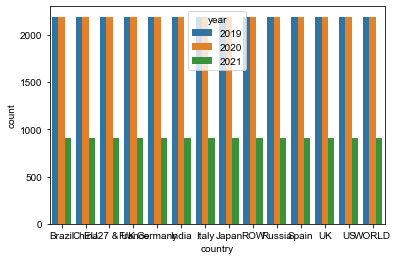

In [12]:
sns.countplot(data["country"],hue=data["year"])
sns.set(rc={'figure.figsize':(15,25)})
#this viz shows that the amount of data available for the year 2019/2020  for each country is quite the same(no outlier) 

Text(0, 0.5, 'value')

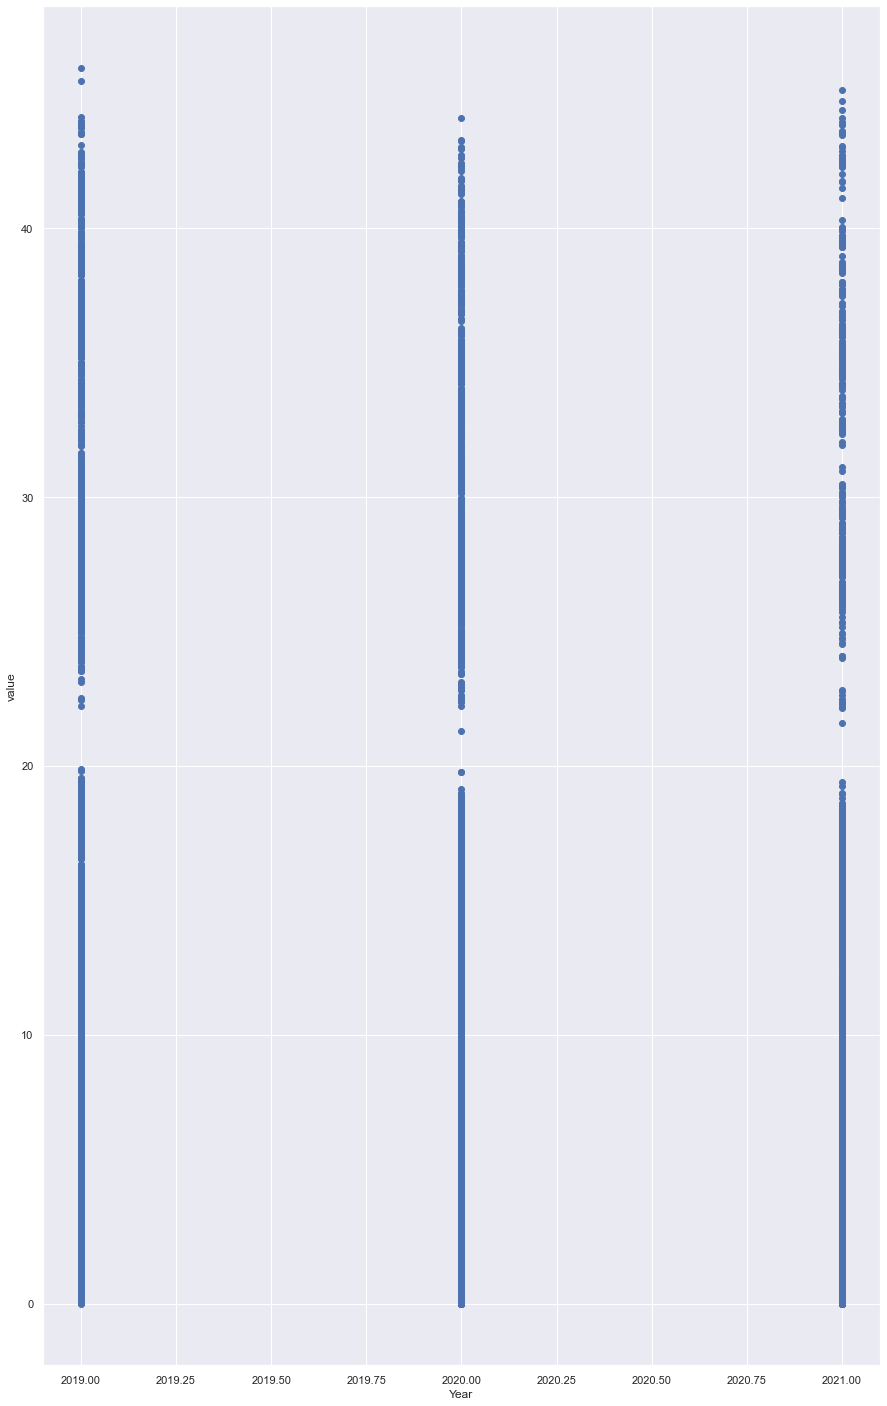

In [13]:
plt.scatter(data["year"],data["value"])
plt.xlabel("Year")
plt.ylabel("value")
#plotting the target "value" against year (some outliers in 2019 but the data looks normal)

Text(0, 0.5, 'value')

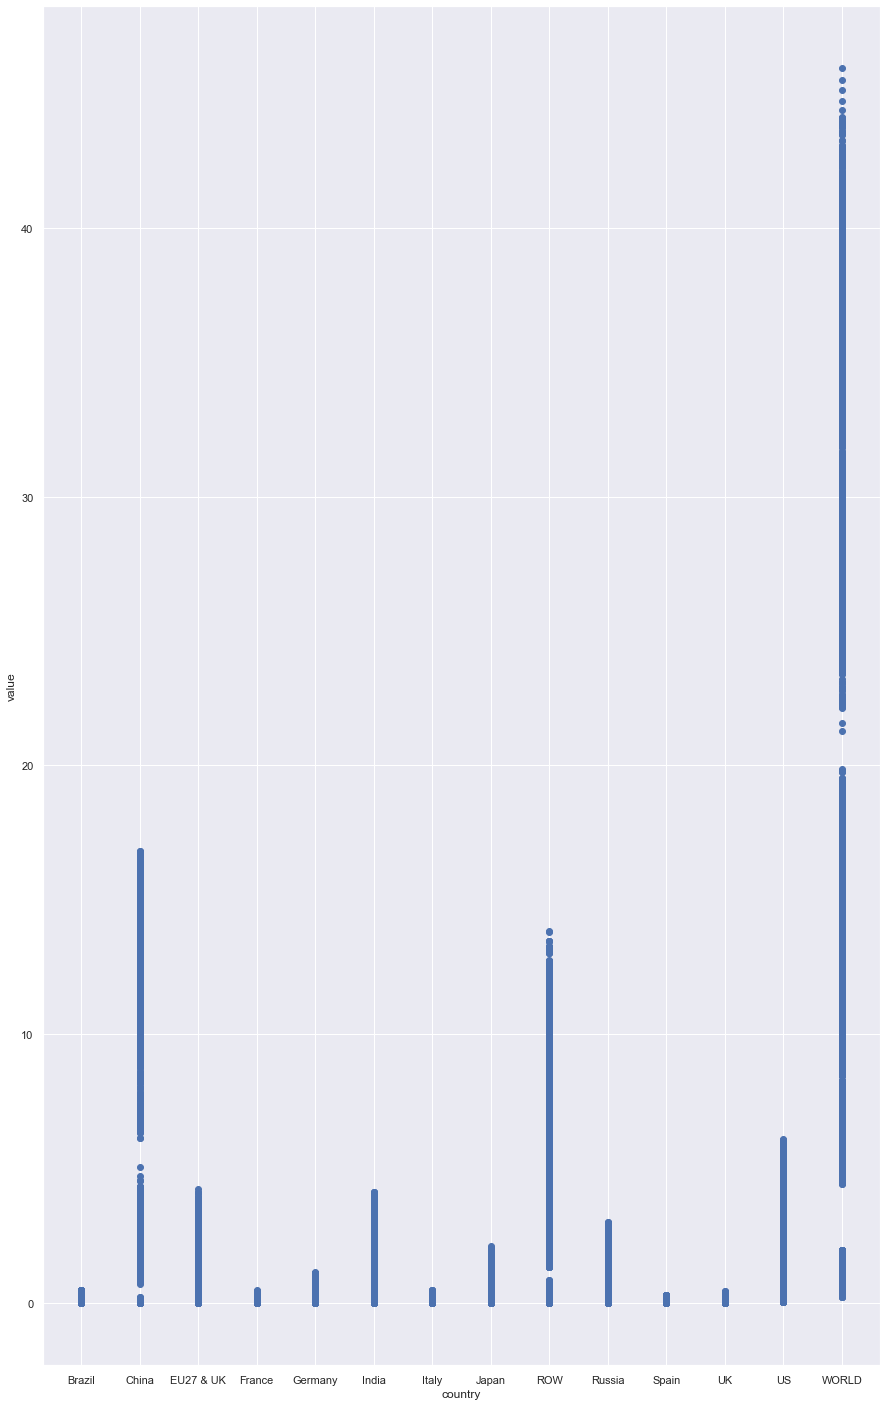

In [14]:
plt.scatter(data["country"],data["value"])
plt.xlabel("country")
plt.ylabel("value")
#china tops the carbon emission list,U.S comes second, ROW , EU27&UK World are combined contries

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='value'>

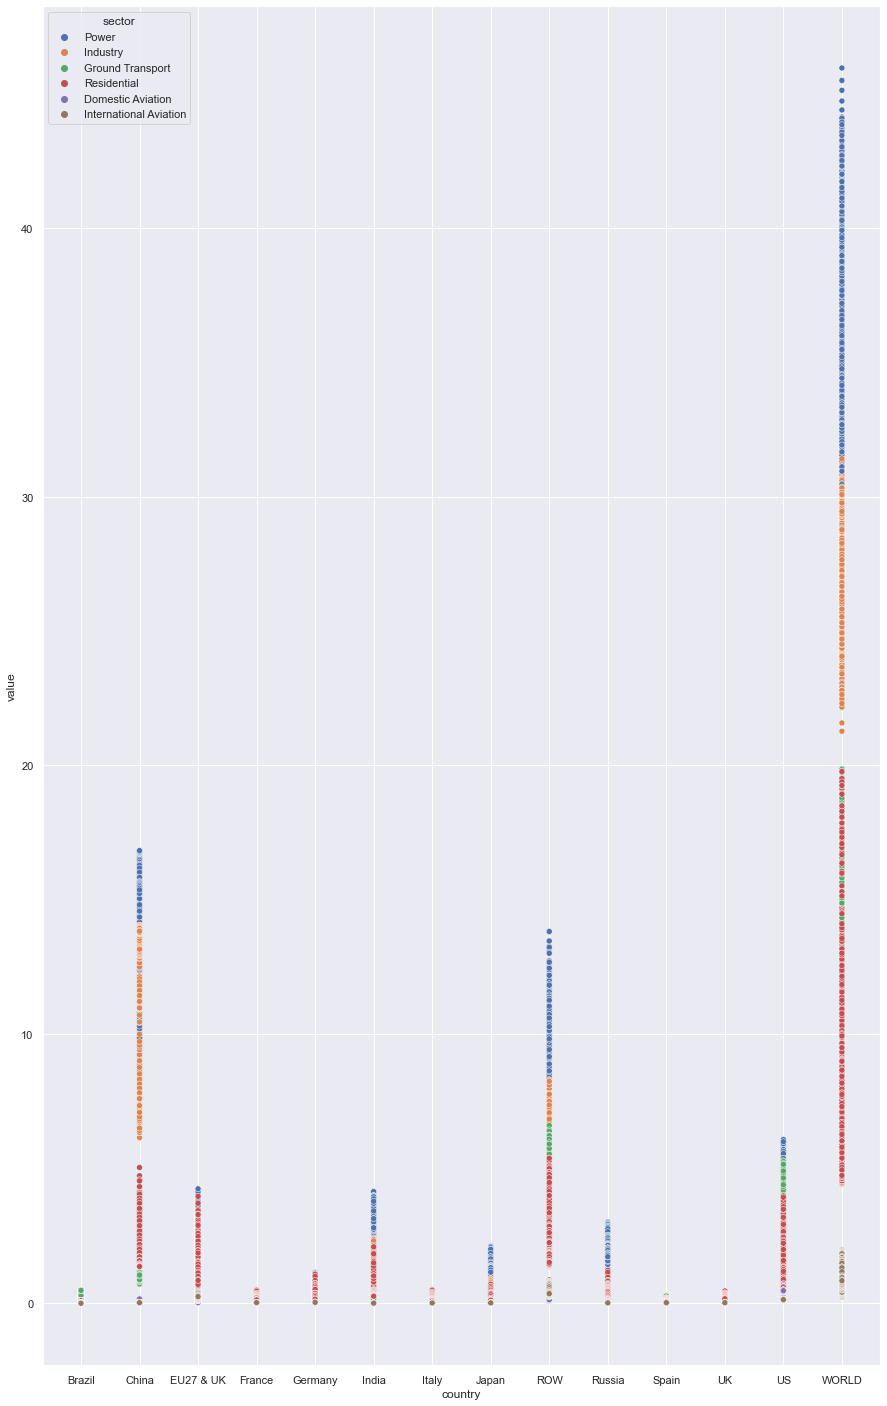

In [15]:
sns.scatterplot(data["country"],data["value"],hue=data["sector"])
#this shows which sector seems to be more dominant in the countries

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='value'>

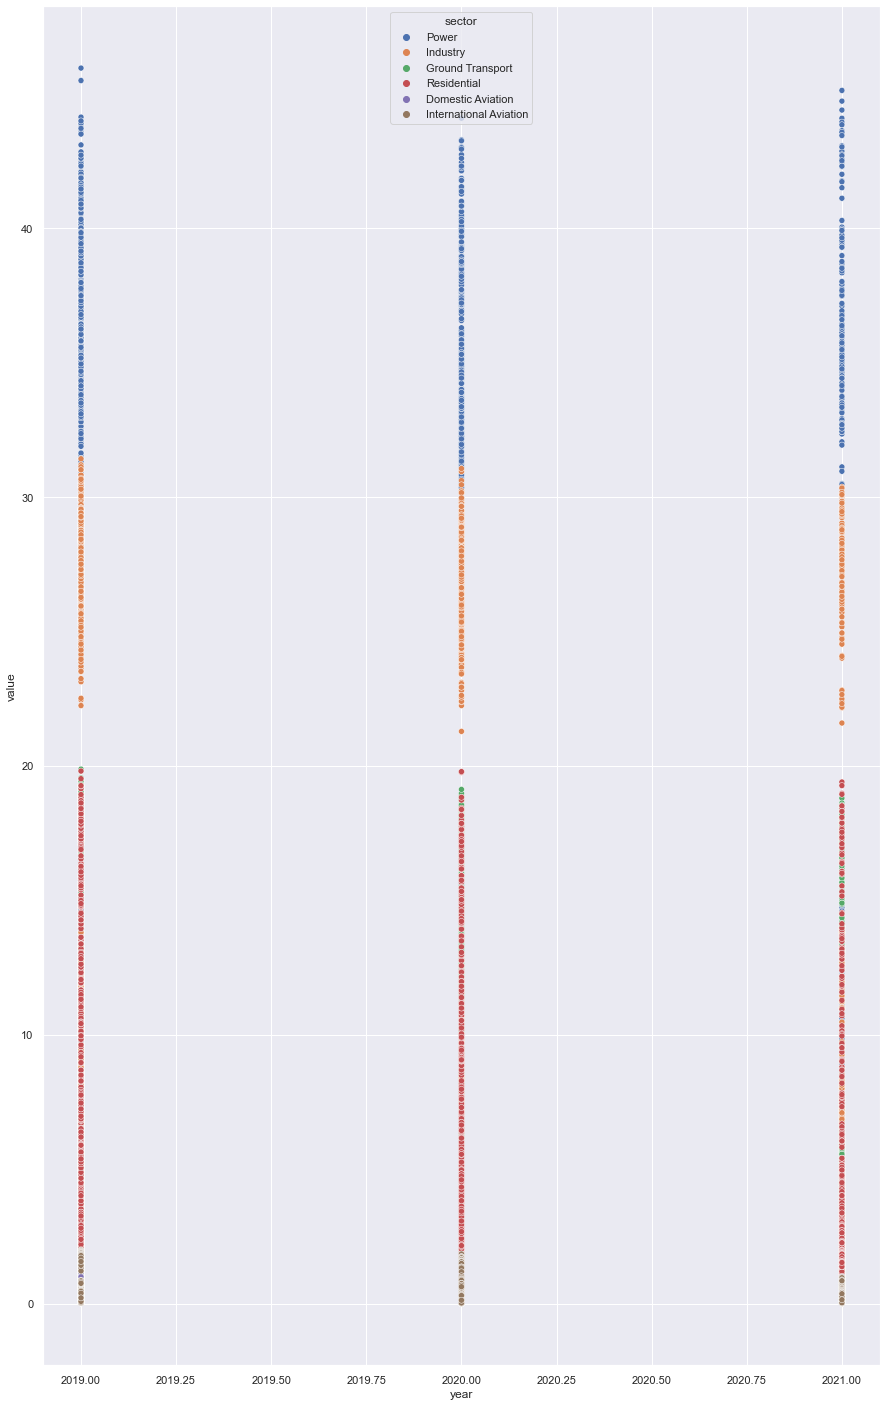

In [16]:
sns.scatterplot(data["year"],data["value"],hue=data["sector"])
#amount of emissions genereated from each sector for every year

Data Preprocessing

In [17]:
#data = pd.get_dummies(data, columns = ['country'],drop_first=True)
#test = pd.get_dummies(test, columns = ['country'],drop_first=True)

In [18]:
data['country'].replace(['Brazil','China','EU27 & UK','France','Germany','India','Italy','Japan','ROW','Russia','Spain','UK','US','WORLD'],[0.18,4.85,1.42,0.13,0.30,1.09,0.14,0.49,4.41,0.68,0.11,0.16,.21,15.36],inplace= True)

In [19]:
test['country'].replace(['Brazil','China','EU27 & UK','France','Germany','India','Italy','Japan','ROW','Russia','Spain','UK','US','WORLD'],[0.18,4.85,1.42,0.13,0.30,1.09,0.14,0.49,4.41,0.68,0.11,0.16,.21,15.36],inplace= True)

In [20]:
data.groupby('country',)['value'].mean()

country
0.11      0.111181
0.13      0.133748
0.14      0.143987
0.16      0.161742
0.18      0.189311
0.21      2.214571
0.30      0.300997
0.49      0.490268
0.68      0.683519
1.09      1.093507
1.42      1.423781
4.41      4.416048
4.85      4.852086
15.36    15.363092
Name: value, dtype: float64

In [21]:
data.head()

,country,sector,value,timestamp,year,month,day
0,0.18,Power,0.108768,1546272000,2019,1,1
1,4.85,Power,14.251000,1546272000,2019,1,1
2,1.42,Power,1.676920,1546272000,2019,1,1
3,0.13,Power,0.049075,1546272000,2019,1,1
4,0.30,Power,0.349691,1546272000,2019,1,1


In [22]:
datetime.fromtimestamp(data["timestamp"][0])

datetime.datetime(2018, 12, 31, 17, 0)

In [23]:
datetime.fromtimestamp(data["timestamp"][1])

datetime.datetime(2018, 12, 31, 17, 0)

In [24]:
datetime.fromtimestamp(data["timestamp"][333])

datetime.datetime(2019, 1, 23, 17, 0)

In [25]:
datetime.fromtimestamp(data["timestamp"][334])

datetime.datetime(2019, 1, 23, 17, 0)

In [26]:
data.drop("timestamp",axis=1, inplace=True)
test.drop("timestamp",axis=1, inplace=True)

In [27]:
data.groupby('sector',)['value'].mean()

sector
Domestic Aviation         0.121449
Ground Transport          2.511223
Industry                  3.941626
International Aviation    0.180236
Power                     5.286002
Residential               1.490909
Name: value, dtype: float64

In [28]:
data['sector'].replace(['Power','Industry','Ground Transport','Residential','International Aviation','Domestic Aviation'],[6,5,4,3,2,1],inplace= True)
test['sector'].replace(['Power','Industry','Ground Transport','Residential','International Aviation','Domestic Aviation'],[6,5,4,3,2,1],inplace= True)

Train and test with Catboost Regressor

In [29]:
test1=test.drop('value',axis=1)

In [30]:
test_values=test.value

In [31]:
y = data.value
x = data.drop('value', axis =1)


In [32]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score



In [33]:
X_train, X_test, y_train , y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [34]:
model= CatBoostRegressor()

In [35]:
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }

GridSearch to get best Hyperparameters

In [120]:
 grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 5.1059326	total: 131ms	remaining: 13s
1:	learn: 4.6278936	total: 146ms	remaining: 7.17s
2:	learn: 4.2044998	total: 171ms	remaining: 5.54s
3:	learn: 3.8201356	total: 197ms	remaining: 4.74s
4:	learn: 3.4725900	total: 223ms	remaining: 4.23s
5:	learn: 3.1557356	total: 243ms	remaining: 3.81s
6:	learn: 2.8738867	total: 272ms	remaining: 3.61s
7:	learn: 2.6213923	total: 304ms	remaining: 3.5s
8:	learn: 2.4091154	total: 364ms	remaining: 3.68s
9:	learn: 2.2124128	total: 381ms	remaining: 3.43s
10:	learn: 2.0289117	total: 397ms	remaining: 3.21s
11:	learn: 1.8695123	total: 417ms	remaining: 3.06s
12:	learn: 1.7303264	total: 431ms	remaining: 2.88s
13:	learn: 1.6012332	total: 455ms	remaining: 2.79s
14:	learn: 1.4908619	total: 471ms	remaining: 2.67s
15:	learn: 1.3870393	total: 487ms	remaining: 2.56s
16:	learn: 1.2965985	total: 510ms	remaining: 2.49s
17:	learn: 1.2156785	total: 525ms	remaining: 2.39s
18:	learn: 1.1502102	total: 541ms	remaining: 2.31s
19:	learn: 1.0880451	total: 558ms	remaining:

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002880E08B1F0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [121]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9926347955961158

 The best parameters across ALL searched params:
 {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}


Running the model and calculating the Latency

In [36]:
start = time.time()
model= CatBoostRegressor(depth=10, learning_rate=0.1, iterations=100)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
end = time.time()
print(f"Runtime of the program is {end - start}")

0:	learn: 5.1059326	total: 582ms	remaining: 57.6s
1:	learn: 4.6278936	total: 596ms	remaining: 29.2s
2:	learn: 4.2044998	total: 620ms	remaining: 20s
3:	learn: 3.8201356	total: 645ms	remaining: 15.5s
4:	learn: 3.4725900	total: 672ms	remaining: 12.8s
5:	learn: 3.1557356	total: 693ms	remaining: 10.9s
6:	learn: 2.8738867	total: 719ms	remaining: 9.55s
7:	learn: 2.6213923	total: 745ms	remaining: 8.57s
8:	learn: 2.4091154	total: 759ms	remaining: 7.67s
9:	learn: 2.2124128	total: 790ms	remaining: 7.11s
10:	learn: 2.0289117	total: 819ms	remaining: 6.63s
11:	learn: 1.8695123	total: 844ms	remaining: 6.19s
12:	learn: 1.7303264	total: 860ms	remaining: 5.75s
13:	learn: 1.6012332	total: 886ms	remaining: 5.44s
14:	learn: 1.4908619	total: 915ms	remaining: 5.18s
15:	learn: 1.3870393	total: 953ms	remaining: 5s
16:	learn: 1.2965985	total: 1.01s	remaining: 4.95s
17:	learn: 1.2156785	total: 1.04s	remaining: 4.74s
18:	learn: 1.1502102	total: 1.07s	remaining: 4.56s
19:	learn: 1.0880451	total: 1.1s	remaining: 4.

Cross Validation

In [125]:
def rmse(y_val,prediction):
    ans=np.sqrt(mean_squared_error(y_val,prediction))
    return ans

In [127]:
r2_score(y_test,predictions)

0.9935768905444511

In [128]:
rmse(y_test, predictions)

0.4483949493796911

Using the Model on the Validation Datasets

In [134]:
prediction2=model.predict(test1)

In [135]:
rmse(test_values,prediction2)

0.49096711923040487

In [136]:
r2_score(test_values, prediction2)

0.9928335965305577